# ***Set parameters***

In [1]:
__algo__ = "MBKMEANS"              #Name of the Clustering algorithm
__emb__ = "glove"                #Name of the Word Embeddings used (glove, w2v, ftt), MUST set directory below
__sentemb__ = "pmeans5"          #Name of Sentence Embedding algorithm used
recnum = 3000                   #Number of records to be read from files
k = 50                           #Number of Clusters
usesqrt = False                  #Set value of k to sqrt of recnum, overrides k
randomsample = False             #Random Sampling to be True/False for records which are read
embedDir = "../MegaSentEmbs/"    #Directory where embeddings are saved for that selected embedding
modelDir = "../models/"          #Directory where models are saved
megadfDir = "../MegaDfs/"        #Directory Where Megadf is to be saved
plotDir = "../plots/"            #Directory where plots are saved
dumpDir = "../dump/"             #Directory where test outcomes are saved
%matplotlib inline

# Actual Code

### imports and time

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets
import seaborn as sns
import os, subprocess
import datetime, time
import pickle

In [3]:
start_time = time.time()
start_datetime = datetime.datetime.now()
print("Start time: ", start_time)
print("Start datetime: ", start_datetime)
# print(datetime.datetime.now()-start_datetime)

Start time:  1586859856.4981935
Start datetime:  2020-04-14 15:54:16.498251


### File Settings

In [4]:
oldlist = os.listdir(embedDir)
filelist = sorted([embedDir+f for f in oldlist if f[-3:]=="pkl"])
filenum = len(filelist)
smalllist = filelist[:filenum]
print("Length of Smalllist: ", len(smalllist))

Length of Smalllist:  116


### Number of Records
It is Recommended to Set this at the top parameters

In [5]:
recnum = recnum

### Read all the pandas dataframes

In [6]:
%%time
megadf = pd.DataFrame()

if randomsample == True:
    print("randomsample: ", randomsample)
    for f in smalllist:
        tempdf = pd.read_pickle(f)
        megadf = megadf.append(tempdf, ignore_index = True)
    megadf = megadf.sample(recnum, random_state=42)
else:
    print("randomsample: ", randomsample)
    for f in smalllist:
        tempdf = pd.read_pickle(f)
        megadf = megadf.append(tempdf, ignore_index = True)
        if megadf.shape[0] >= recnum:
            megadf = megadf[:recnum]
            break

print("megadf.shape: ", megadf.shape)

randomsample:  False
megadf.shape:  (3000, 4)
CPU times: user 111 ms, sys: 19.9 ms, total: 131 ms
Wall time: 133 ms


In [7]:
predata = megadf["embedding"]
data = np.matrix(predata.to_list())
print(data.shape)

(3000, 250)


### Number of Clusters
It is Recommended to Set this at the top parameters

In [8]:
if usesqrt == True:
    print("usesqrt: ", usesqrt)
    sqrt_k = int(np.sqrt(data.shape[0]))
    k = int(sqrt_k)
else:
    print("usesqrt: ", usesqrt)
    k = k
print("k: ", k)

usesqrt:  False
k:  50


## Clustering
Please modify the functions here to change algorithm

In [9]:
%%time
print("Starting Clustering Process")
model = cluster.MiniBatchKMeans(n_clusters=k, n_init = 20, random_state=42, batch_size=32, max_iter=1000, verbose=1)
model.fit(data)
print("Done")
print("mbkmeans.fit(data) Done!")

Starting Clustering Process
Init 1/20 with method: k-means++
Inertia for init 1/20: 877.751664
Init 2/20 with method: k-means++
Inertia for init 2/20: 764.597290
Init 3/20 with method: k-means++
Inertia for init 3/20: 788.613283
Init 4/20 with method: k-means++
Inertia for init 4/20: 791.857344
Init 5/20 with method: k-means++
Inertia for init 5/20: 841.436207
Init 6/20 with method: k-means++
Inertia for init 6/20: 813.527547
Init 7/20 with method: k-means++
Inertia for init 7/20: 760.483549
Init 8/20 with method: k-means++
Inertia for init 8/20: 707.240691
Init 9/20 with method: k-means++
Inertia for init 9/20: 745.319963
Init 10/20 with method: k-means++
Inertia for init 10/20: 771.647316
Init 11/20 with method: k-means++
Inertia for init 11/20: 778.475429
Init 12/20 with method: k-means++
Inertia for init 12/20: 736.749843
Init 13/20 with method: k-means++
Inertia for init 13/20: 786.496738
Init 14/20 with method: k-means++
Inertia for init 14/20: 781.735936
Init 15/20 with method: 

Minibatch iteration 104/94000: mean batch inertia: 12.305709, ewa inertia: 12.370097 
Minibatch iteration 105/94000: mean batch inertia: 11.241381, ewa inertia: 12.346026 
Minibatch iteration 106/94000: mean batch inertia: 11.418699, ewa inertia: 12.326250 
Minibatch iteration 107/94000: mean batch inertia: 11.574784, ewa inertia: 12.310224 
Minibatch iteration 108/94000: mean batch inertia: 12.171250, ewa inertia: 12.307260 
Minibatch iteration 109/94000: mean batch inertia: 12.685729, ewa inertia: 12.315331 
Minibatch iteration 110/94000: mean batch inertia: 11.129631, ewa inertia: 12.290045 
Minibatch iteration 111/94000: mean batch inertia: 10.890276, ewa inertia: 12.260193 
[MiniBatchKMeans] Reassigning 15 cluster centers.
Minibatch iteration 112/94000: mean batch inertia: 10.610719, ewa inertia: 12.225016 
Minibatch iteration 113/94000: mean batch inertia: 12.814554, ewa inertia: 12.237589 
Minibatch iteration 114/94000: mean batch inertia: 12.135926, ewa inertia: 12.235420 
Mini

### Saving the output data into vars

In [10]:
centroids = model.cluster_centers_
labels = model.labels_
megadf["clusterlabel"]=labels
centroidDF = pd.DataFrame(centroids)


## Plotting

Text(0.5, 1.0, 'MBKMEANS with k=50 records=3000 features=250 using glove')

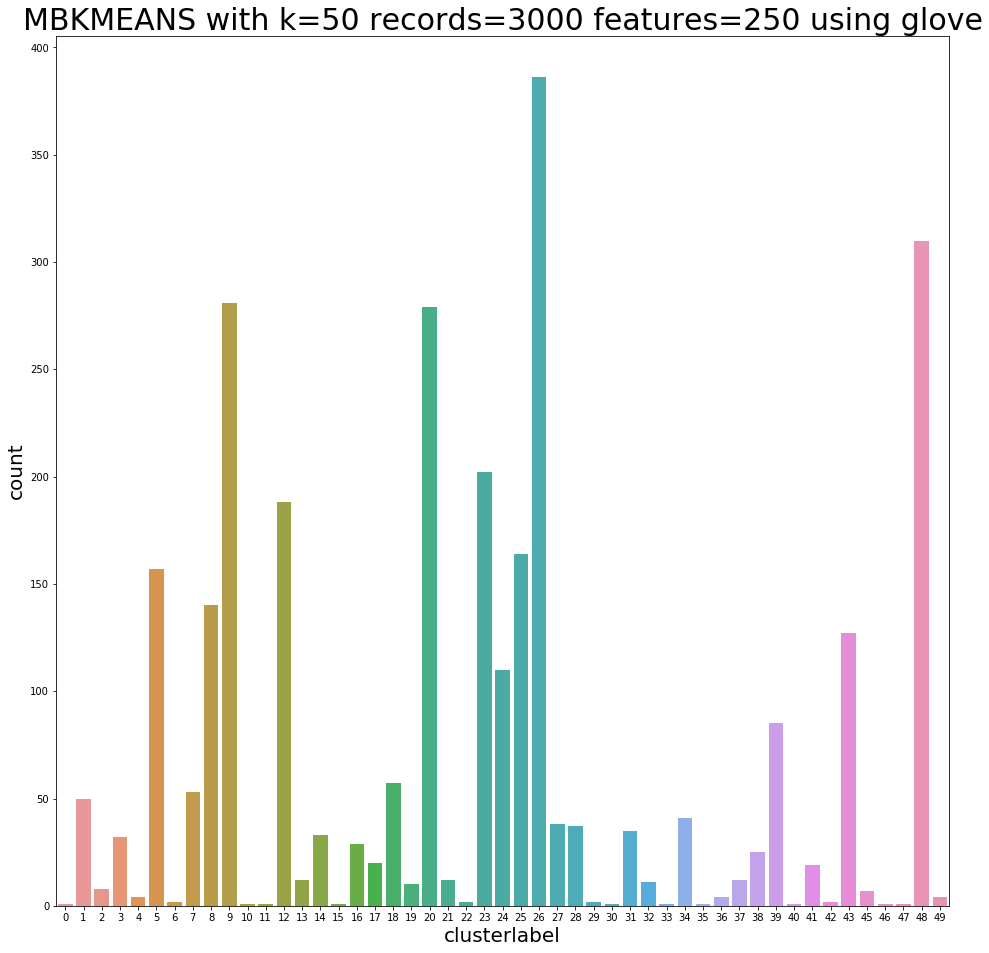

In [11]:
plt.figure(figsize=(16,16))
titlestring = "{} with k={} records={} features={} using {}".format(__algo__, k, data.shape[0], data.shape[1], __emb__)
snsplot = sns.countplot("clusterlabel", data=megadf)
snsplot.xaxis.label.set_size(20)
snsplot.yaxis.label.set_size(20)
plt.title(
        titlestring,
        fontdict = {'fontsize' : 30}
    )

### *Name given to saved files*

In [12]:
name = "{}_{}_{}_K{}_R{}_F{}".format(__algo__, __emb__, __sentemb__, k, data.shape[0], data.shape[1])
name

'MBKMEANS_glove_pmeans5_K50_R3000_F250'

### Saving Data

Save model

In [13]:
modelname = "{}_model.pkl".format(name)
pickle.dump(model, open(modelDir + modelname, 'wb'))

Save Plot

In [14]:
snspltname = "{}_plt.png".format(name)
snsplot.figure.savefig(plotDir + snspltname)

Save Megadf

In [15]:
clusterdfname = "{}_clustered_megadf.pkl".format(name)
megadf.to_pickle(megadfDir + clusterdfname)

Save Centroids

In [16]:
centroidDF = pd.DataFrame(centroids)
centroidDFname = "{}_centroids.pkl".format(name)
centroidDF.to_pickle(megadfDir + centroidDFname)
print(centroidDF.shape)
print(centroidDF.columns)

(50, 250)
RangeIndex(start=0, stop=250, step=1)


#### Total Time to Exec

In [17]:
end_time = time.time()
end_datetime = datetime.datetime.now()
# print("end_time:",  end_time)
print("end_datetime: ", end_datetime)
print("done! {}".format(round(end_time-start_time, 2)))
print("Time taken: ", str(end_datetime-start_datetime))

end_datetime:  2020-04-14 15:54:18.622247
done! 2.12
Time taken:  0:00:02.123996


#### Open dataframe to test

In [18]:
sub = megadf.loc[:, ["id", "title", "abstract", "clusterlabel"]]
sub.tail()

,id,title,abstract,clusterlabel
2995,1588822,Defining the clinical role of the mammalian ta...,"[lung, cancer, biggest, cancer, killer, patien...",23
2996,1588823,Bio-functionalised nanoparticles for enzyme se...,"[inorganic, nanoparticles, accompanying, diver...",23
2997,1588824,Lithological mapping on the Antarctic Peninsul...,"[antarctic, peninsula, larger, uk, limited, ge...",7
2998,1588825,"WWOX, tumour suppressor and modifier gene, as ...","[wwox, tumour, suppressor, gene, demonstrated,...",23
2999,1588826,Improving efficiency in drive lines : an exper...,"[research, concern, improvement, power, effici...",9


In [19]:
megadf.columns

Index(['id', 'title', 'abstract', 'embedding', 'clusterlabel'], dtype='object')